# Color Detection of any image using OpenCv library

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = ("G:\DATA\Python\color recognition\colorpic.jpg")
img=cv2.imread(path)

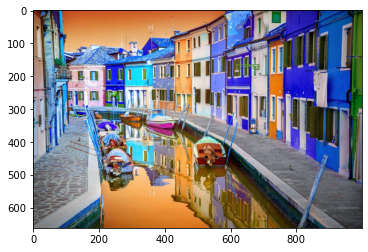

In [3]:
plt.imshow(img)

In [4]:
cols=["color","color_name","hex","R","G","B"]
data = pd.read_csv("G:\DATA\Python\color recognition\colors.csv", names=cols, header=None)
data.shape

(865, 6)

In [5]:
data.head()

,color,color_name,hex,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [6]:
#declaring global variables (are used later on)
clicked = False
r = g = b = xpos = ypos = 0

In [7]:
#function to calculate minimum distance from all colors and get the most matching color
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(data)):
        d = abs(R- int(data.loc[i,"R"])) + abs(G- int(data.loc[i,"G"]))+ abs(B- int(data.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = data.loc[i,"color_name"]
    return cname

In [8]:
#function to get x,y coordinates of mouse double click
def draw_function(event, x,y,flags,param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b,g,r,xpos,ypos, clicked
        clicked = True
        xpos = x
        ypos = y
        b,g,r = img[y,x]
        b = int(b)
        g = int(g)
        r = int(r)
       
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_function)


In [9]:
while(1):

    cv2.imshow("image",img)
    if (clicked):
   
        #cv2.rectangle(image, startpoint, endpoint, color, thickness)-1 fills entire rectangle 
        cv2.rectangle(img,(20,20), (750,60), (b,g,r), -1)

        #Creating text string to display( Color name and RGB values )
        text = getColorName(r,g,b) + ' R='+ str(r) +  ' G='+ str(g) +  ' B='+ str(b)
        
        #cv2.putText(img,text,start,font(0-7),fontScale,color,thickness,lineType )
        cv2.putText(img, text,(50,50),2,0.8,(255,255,255),2,cv2.LINE_AA)

        #For very light colours we will display text in black colour
        if(r+g+b>=600):
            cv2.putText(img, text,(50,50),2,0.8,(0,0,0),2,cv2.LINE_AA)
            
        clicked=False

    #Break the loop when user hits 'esc' key    
    if cv2.waitKey(20) & 0xFF ==27:
        break
cv2.destroyAllWindows()